In [60]:
import os
from IPython.display import display

# ROOT contais the project directory 
os.chdir(os.path.dirname(os.getcwd()))

In [61]:
from src.Fundus import Fundus
from src.plots import plot_color_bar

In [62]:
# Read Image, create fundus object
original = Fundus("data/noma/male_extra_0.png")

FileNotFoundError: [Errno 2] No such file or directory: 'data/noma/male_extra_0.png'

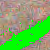

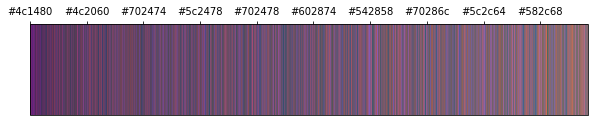

In [51]:
veinsubset =  Fundus(original.im.crop((550, 550, 600, 600)))
veinsubset.im

colors = sorted(veinsubset.palette, key=lambda x: x[1])[:600]
#colors = sorted(colors)

plot_color_bar(colors)
display(Fundus(veinsubset.mask(colors), w=veinsubset.w, h=veinsubset.h).im)

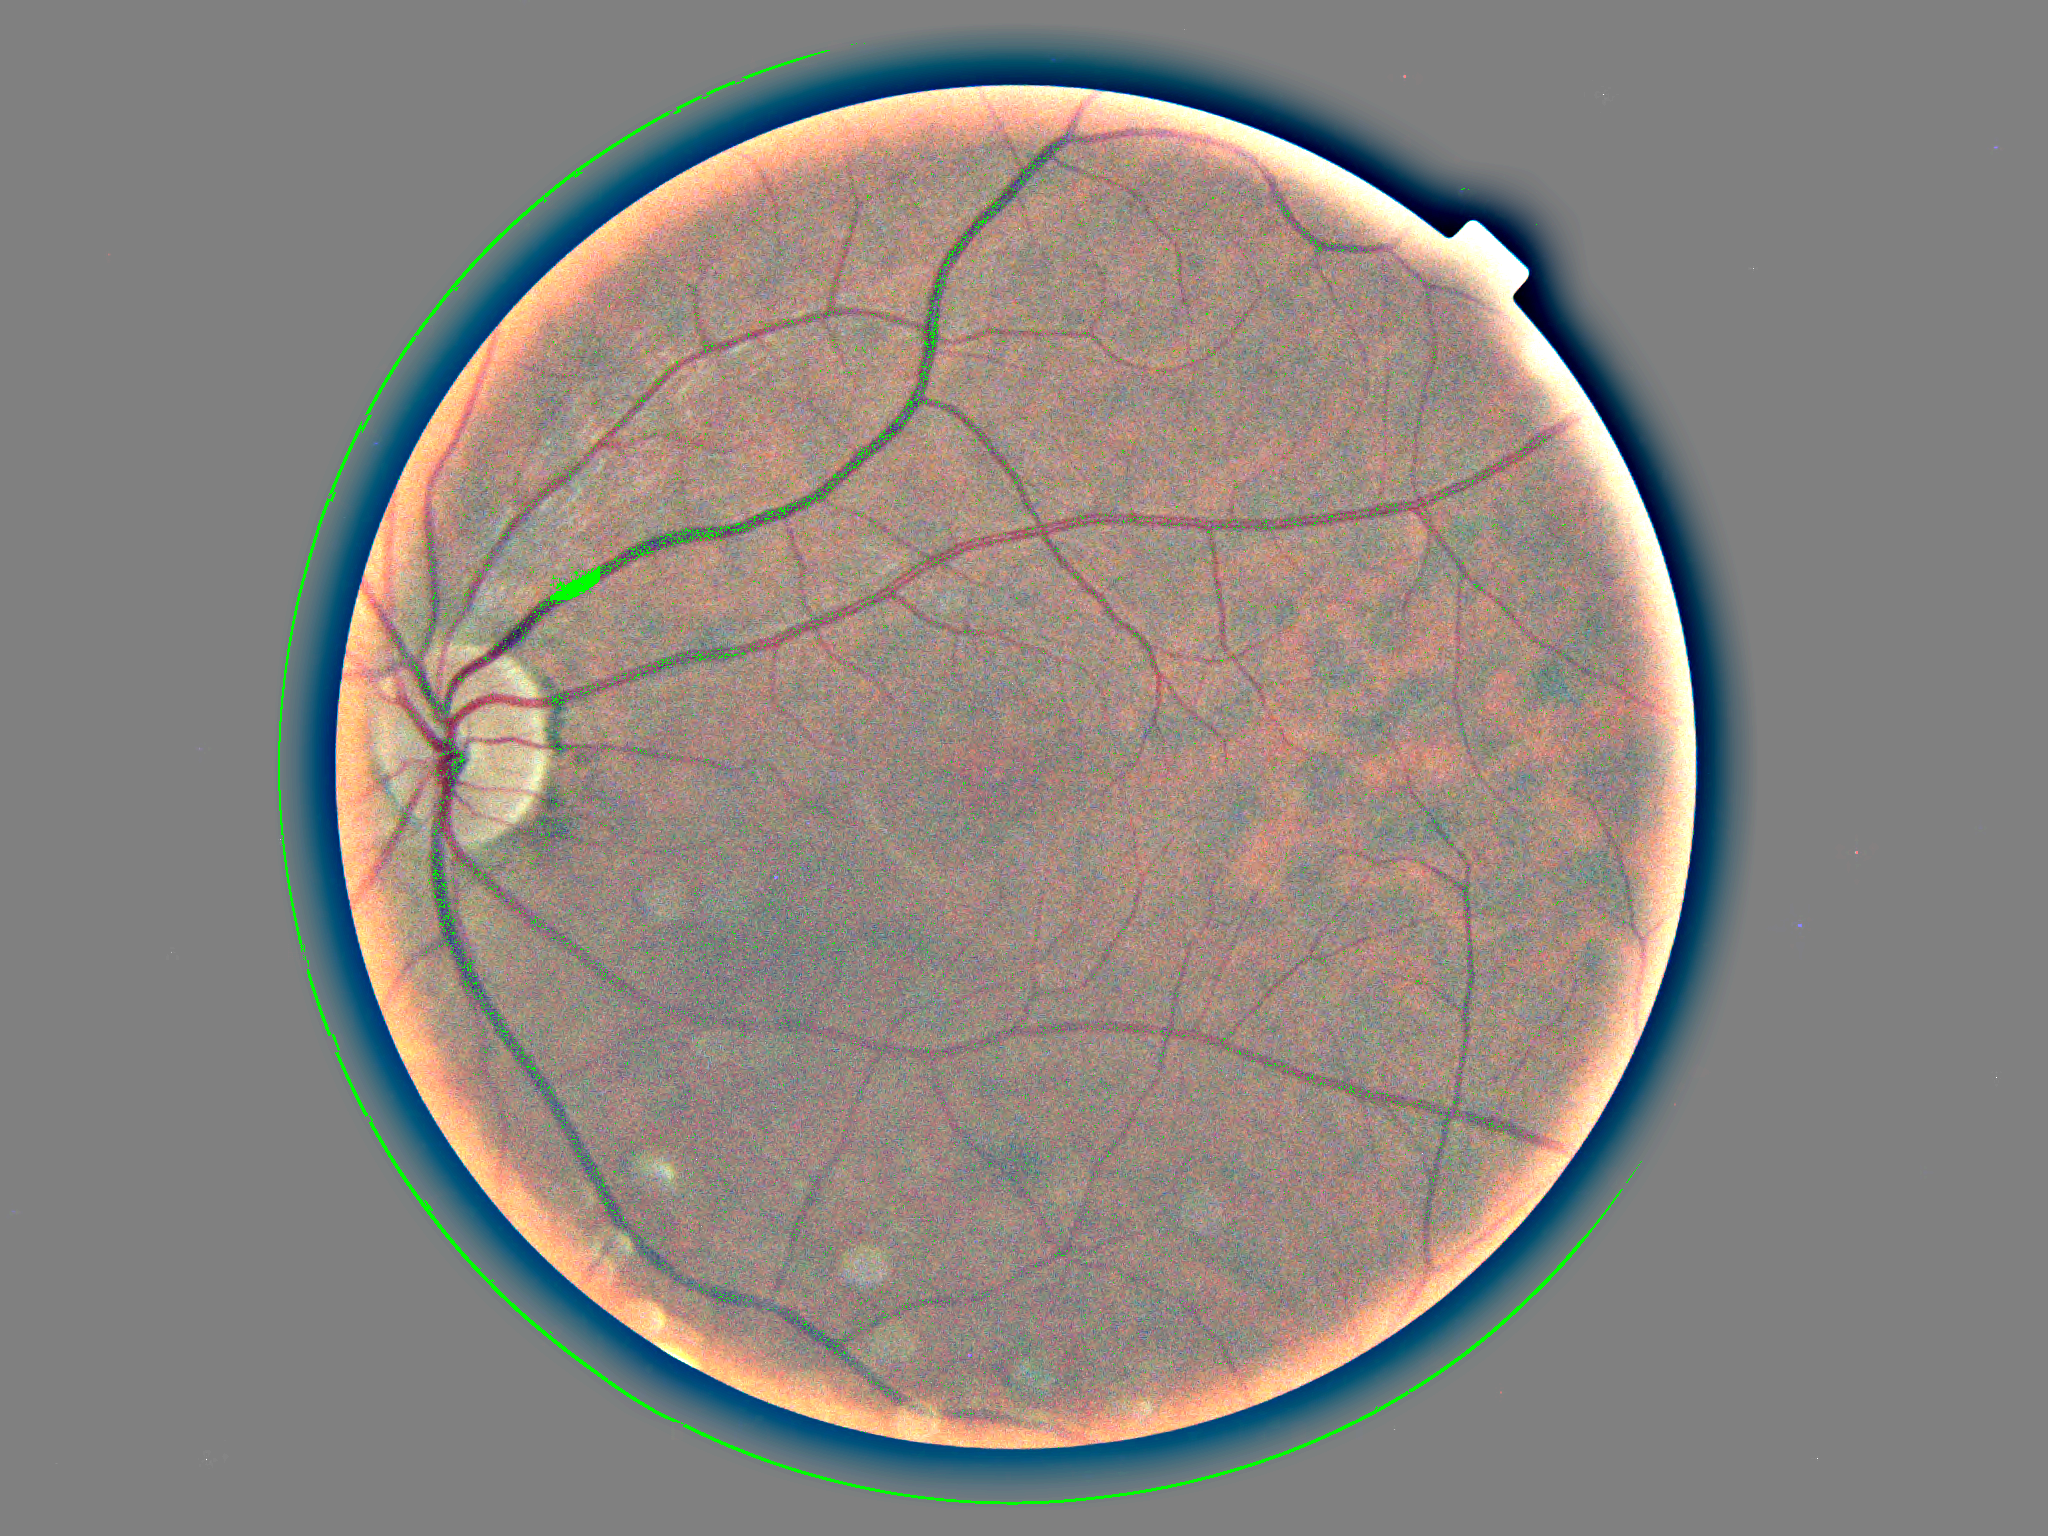

In [59]:
modified = original.mask(colors=colors, inplace=False)
Fundus(modified, w=original.w, h=original.h).im

In [56]:
from tqdm import tqdm
def cluster_pixels(fundus, n):
    pal = fundus.palette
    
    cluster = AgglomerativeClustering(n_clusters=n, affinity='euclidean', linkage='ward')
    clustered = cluster.fit_predict(pal)

    a = np.zeros(fundus.pixels.shape, dtype=np.uint8)
    for c in tqdm(np.unique(clustered)):
        a+=fundus.mask(pal[clustered == c], inverse=True, replacement=pal[clustered == c][0])
        
    return Fundus(a, w=fundus.w, h=fundus.h)

In [57]:
simp1 = cluster_pixels(original, len(original.palette)//2)

100%|██████████| 17035/17035 [06:21<00:00, 44.65it/s]


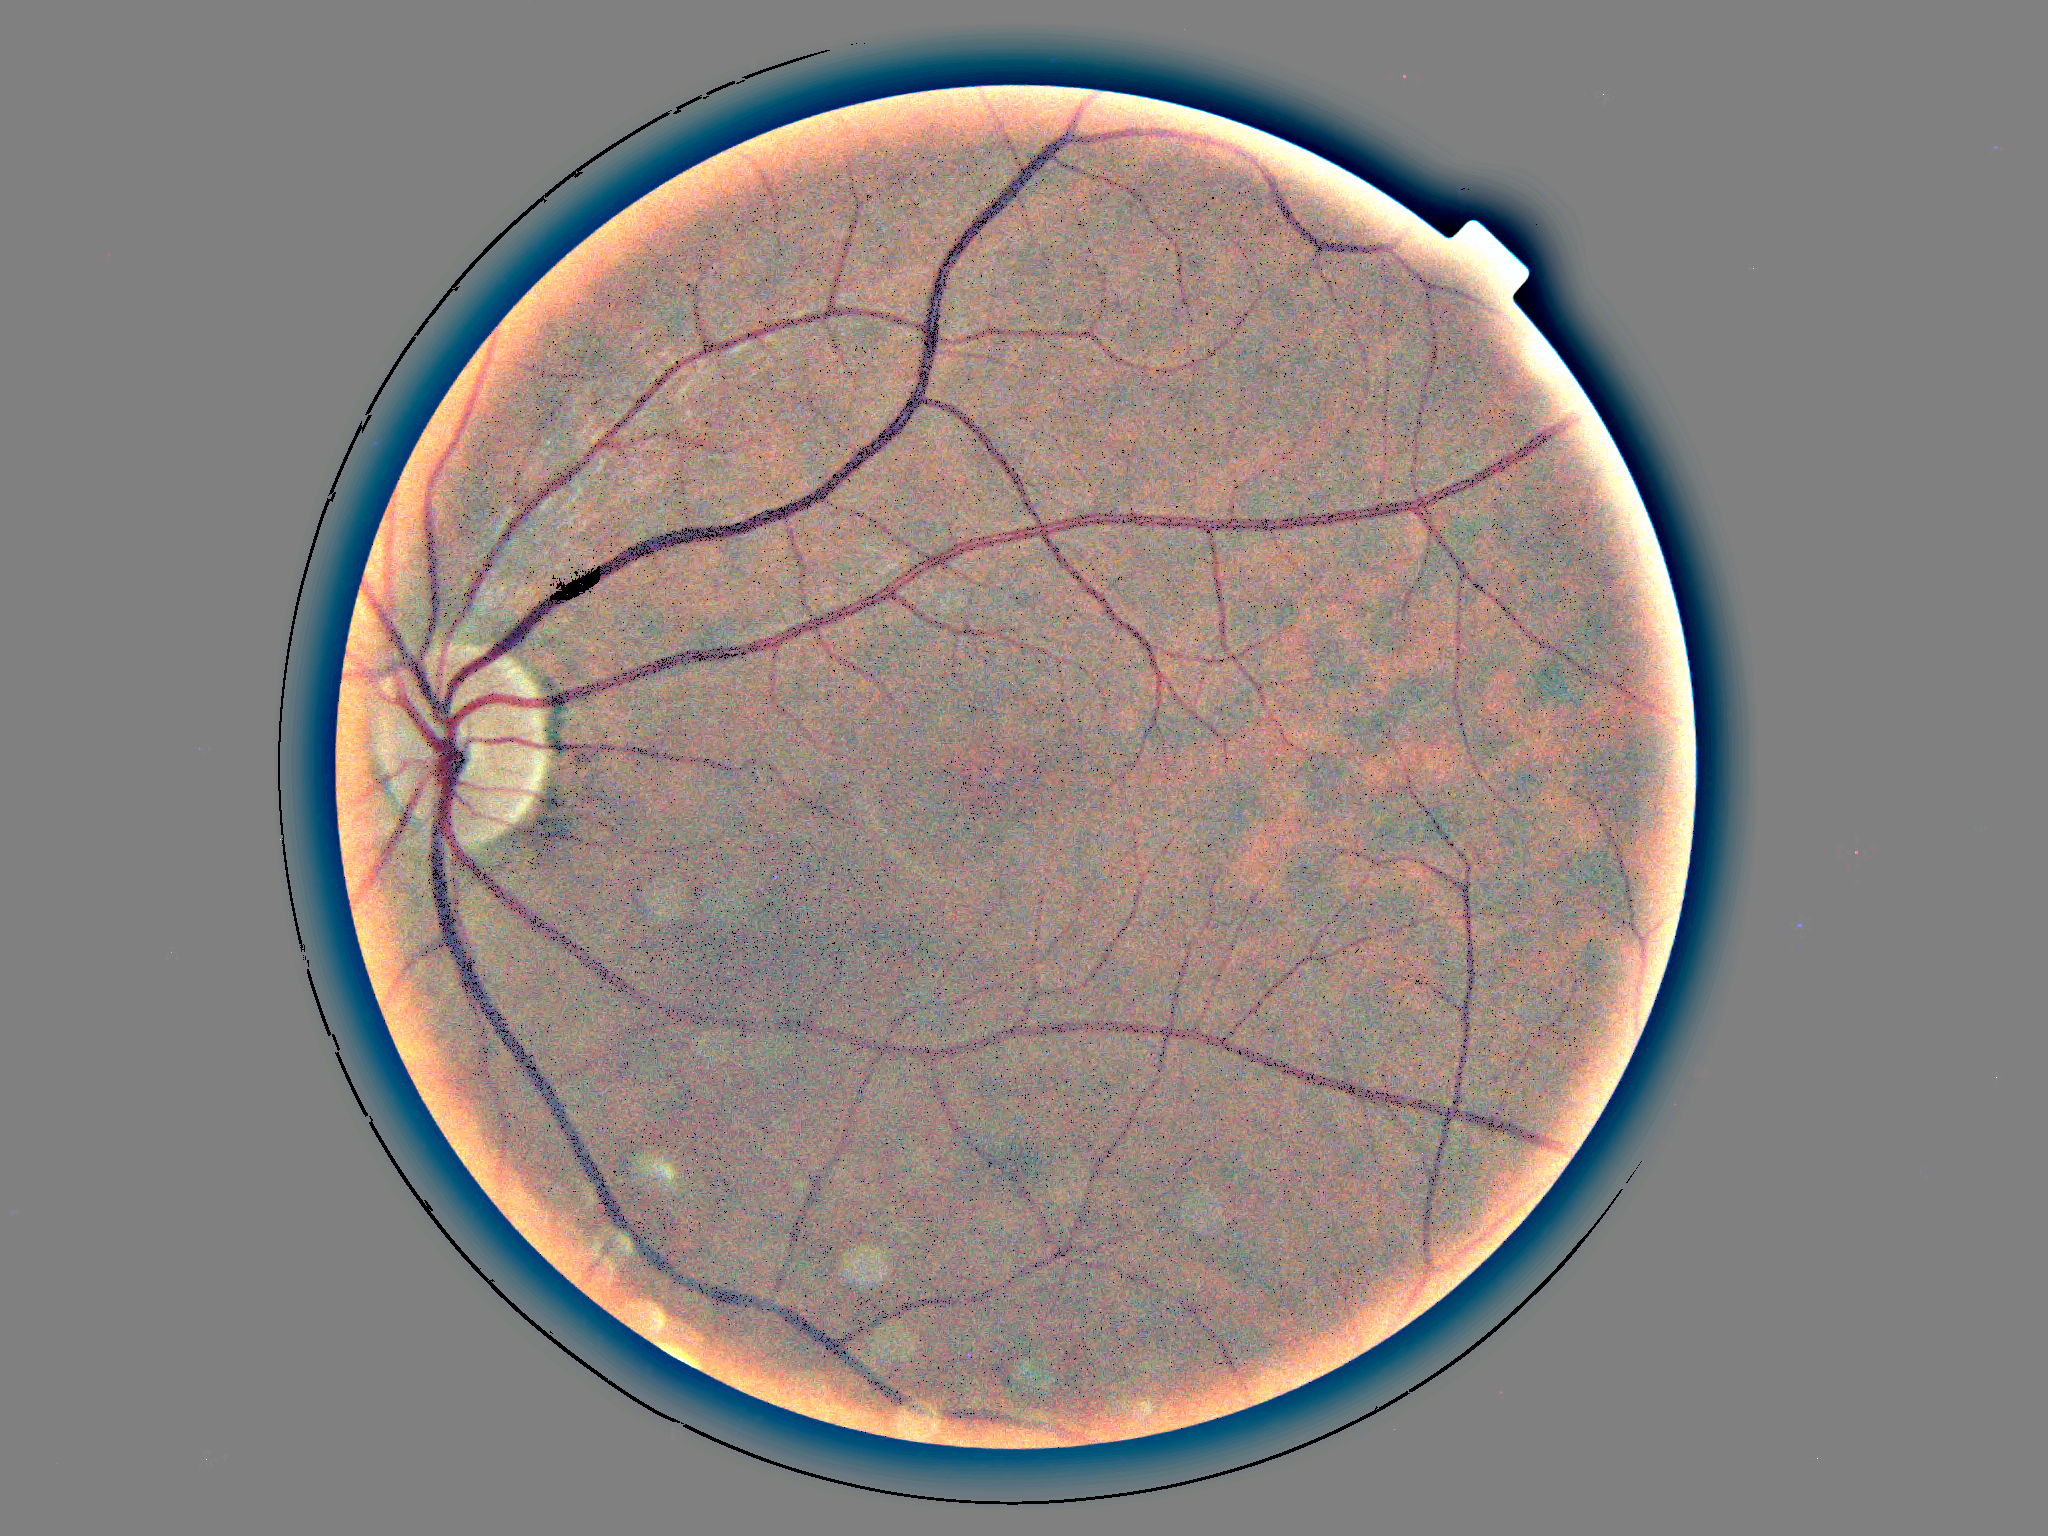

In [58]:
simp1.im